# Лабораторна робота №2
# Тема: Використання Pandas для аналізу даних
# Мета: Вивчення основних функцій Pandas для аналізу даних.

<br>

<div style="background-color: white;">
Виконав: студент групи КН - 222c Максименко Валентин Михайлович 
</div>
<div style="background-color: white;">
Перевірив: асистент кафедри Герман Олександрович Зверцев
</div>

## Завдання

<br>

<div style="background-color: white;">
1.Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com
(https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)
</div>
<div style="background-color: white;">
2.Виконайте вправи по варіантах. Для розрахунку номеру варіанту
скористуватися формулою. N = (n + 4) % 5 + 1 , де N – номер варіанту, n –
номер у списку групи.
</div>

In [1]:
N = (5 + 4) % 5 + 1
N

5

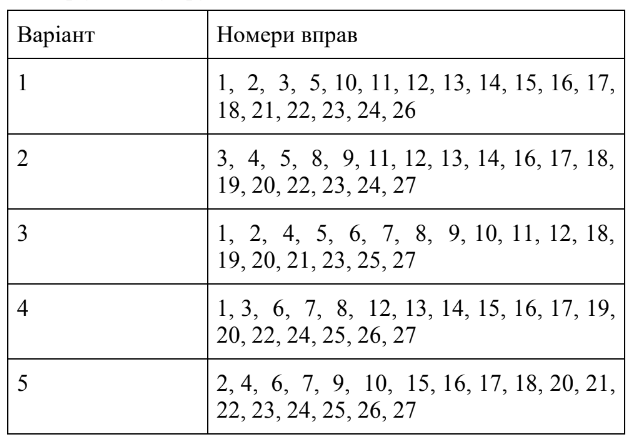

2. Вивести останні 8 рядків набору даних.

In [16]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')
last_8_rows = df.tail(8)
print(last_8_rows)

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


4. Отримайте загальну інформацію про дані у наборі даних.

In [17]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')
data_info = df.describe()
print(data_info)

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних.

In [18]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

unique_female_names = df[df['Gender'] == 'F']['Name'].nunique()
unique_male_names = df[df['Gender'] == 'M']['Name'].nunique()

print(f"F: {unique_female_names}")
print(f"M: {unique_male_names}")

F: 64911
M: 39199


7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.

In [19]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')
filtered_data = df[(df['Gender'] == 'M') & (df['Year'] == 2010)]
top_5_male_names = filtered_data.sort_values(by='Count', ascending=False).head(5)
print(top_5_male_names[['Id','Name','Year','Gender','Count']])

              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [4]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

min_count = df['Count'].min()

count_of_min_count = len(df[df['Count'] == min_count])

print(count_of_min_count)

254615


10. Підрахуйте кількість унікальних імен у кожному році.

In [5]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

unique_names_per_year = df.groupby('Year')['Name'].nunique()

print(unique_names_per_year)

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


15. Знайдіть загальну кількість народжень за рік.

In [6]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

births_by_year = df.groupby('Year')['Count'].sum()

print(births_by_year)

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


16. Знайдіть рік, коли народилося найбільше дітей.

In [7]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

births_by_year = df.groupby('Year')['Count'].sum()

year_with_most_births = births_by_year.idxmax()

print(year_with_most_births)

1957


17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.

In [8]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

births_by_year_and_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

print(births_by_year_and_gender)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [9]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

births_by_year_and_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

years_with_more_girls = births_by_year_and_gender[births_by_year_and_gender['F'] > births_by_year_and_gender['M']]

count_of_years = len(years_with_more_girls)

print(count_of_years)

54


20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців).

In [10]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

name_gender_counts = df.groupby(['Name', 'Gender']).size()

count_of_gender_neutral_names = name_gender_counts.groupby('Name').size().eq(2).sum()

print(count_of_gender_neutral_names)

10221


21. Порахуйте, скільки разів хлопчиків називали Barbara.

In [11]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

barbara_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')].shape[0]

print(barbara_count)

79


22. Підрахуйте скільки років проводилось спостереження.

In [12]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

min_year = df['Year'].min()
max_year = df['Year'].max()

years_of_observation = max_year - min_year + 1

print('Спостереження проводилось', years_of_observation, 'років')

Спостереження проводилось 135 років


23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року).

In [13]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

name_counts = df.groupby(['Name', 'Year', 'Gender'])['Count'].sum().unstack(fill_value = 0)

gender_neutral_names = name_counts[name_counts['M'] == name_counts['F']]

neutral_names_present_in_every_year = gender_neutral_names.groupby('Name').size()

most_popular_neutral_names = neutral_names_present_in_every_year.sort_values(ascending = False)

print(most_popular_neutral_names)

Name
Delane     9
Toy        9
Arie       8
Ardie      7
Ermal      7
          ..
Jaquese    1
Jaquel     1
Jaqua      1
Jann       1
Zyree      1
Length: 1956, dtype: int64


24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів).

In [14]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

name_counts = df.groupby('Name')['Count'].sum()

most_popular_unpopular_name = name_counts.idxmin()

print(most_popular_unpopular_name)

Aabid


25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

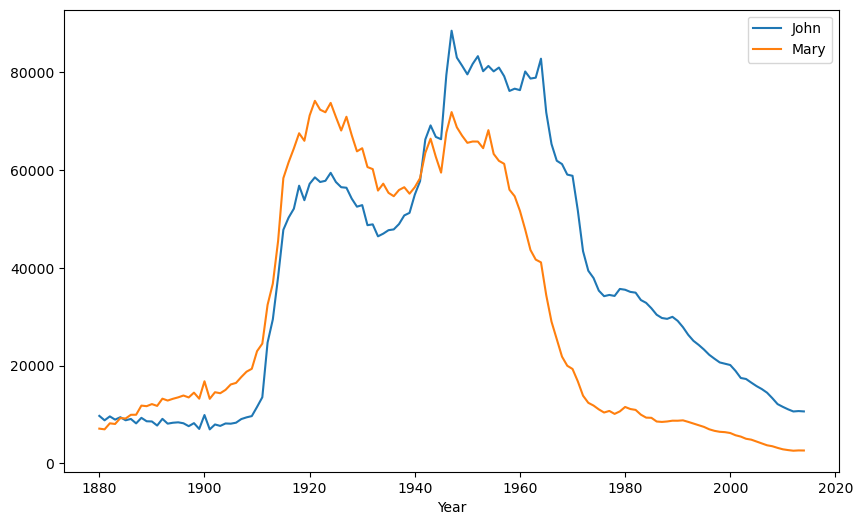

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NationalNames.csv')

john_mary_df = df[df['Name'].isin(['John', 'Mary'])]

name_year_counts = john_mary_df.groupby(['Year', 'Name'])['Count'].sum().unstack()

plt.figure(figsize=(10, 6))
plt.plot(name_year_counts.index, name_year_counts['John'], label='John')
plt.plot(name_year_counts.index, name_year_counts['Mary'], label='Mary')

plt.xlabel('Year')
plt.legend()

plt.show()

26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

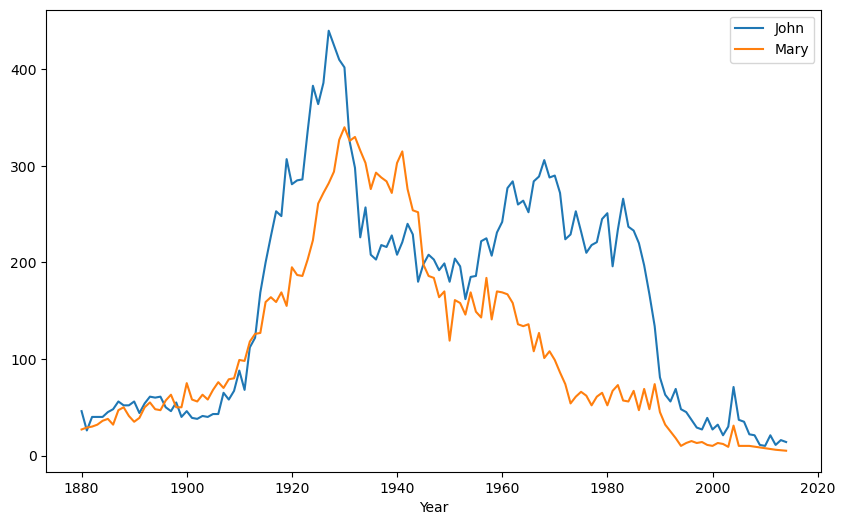

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NationalNames.csv')

female_john = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
male_mary = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

female_john_grouped = female_john.groupby('Year')['Count'].sum()
male_mary_grouped = male_mary.groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))
plt.plot(female_john_grouped.index, female_john_grouped.values, label='John')
plt.plot(male_mary_grouped.index, male_mary_grouped.values, label='Mary')

plt.xlabel('Year')
plt.legend()
plt.show()

27. Знайти найпопулярніші імена в кожному році.

In [10]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

name_counts = df.groupby(['Name', 'Year'])['Count'].sum()

most_popular_names_in_each_year = name_counts.groupby('Year').idxmax()

print(most_popular_names_in_each_year)

Year
1880        (John, 1880)
1881        (John, 1881)
1882        (John, 1882)
1883        (John, 1883)
1884        (John, 1884)
              ...       
2010    (Isabella, 2010)
2011      (Sophia, 2011)
2012      (Sophia, 2012)
2013      (Sophia, 2013)
2014        (Emma, 2014)
Name: Count, Length: 135, dtype: object


**Висновки:** У результаті виконання лабораторної роботи ми ознайомилися з базовими можливостями бібліотеки Pandas для роботи з даними. Ми здійснили завантаження та аналіз даних, використовуючи різноманітні методи Pandas, що дозволило нам отримати необхідну інформацію та виконати різноманітні операції з даними. Вивчення Pandas виявилося корисним для подальших досліджень та аналізу реальних даних.